# 1) Datasets

Vamos a leer el dataset

In [1]:
import pandas as pd
import numpy as np

Se utiliza otra versión del dataset, donde se desmergean todas las celdas involucradas

In [2]:
df = pd.read_excel('/mnt/c/users/Dleg/Data/MOPC/MOPC/Enriquecimiento de Datos/Data Cleaning/Insiders/Datasets/Datasets recibidos/ENRIQ_IN_1672_20210317 - Score.xlsx',skiprows=2, header=[0,1],)

In [3]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                Cuil                Dni      Fecha de Nac. Fecha de Defuncion   
0       2.700187e+10           187386.0         1929-04-02                NaN   
1       2.700508e+10           507550.0         1939-03-05                NaN   
2       2.704172e+10          4171534.0         1940-06-02         2020-12-15   
3       2.004174e+10          4173550.0         1936-01-28                NaN   
4       2.004200e+10          4200228.0         1936-12-08                NaN   

  Unnamed: 4_level_0           Unnamed: 5_level_0       Unnamed: 6_level_0  \
                Sexo                      Titular                    Calle   
0                  F             HERRERA ENA ELSA         REP DE VENEZUELA   
1                  F         ENTRATICO IRMA CLARA               AV URUGUAY   
2                  F  ITUARTE MARGARITA HORTENSIA             PJE GRANDOLI   
3                  M        VISCONTI EDUARDO JUAN       JUAN JOSE VIAMONTE   
4                  M       CACCHIONE MIGUEL ANGEL  BRUNO MARIANO DE ZABALA   

  Unnamed: 7_level_0 Unnamed: 8_level_0 Unnamed: 9_level_0  ...  \
              Numero       Piso y Depto      Codigo Postal  ...   
0               3700                NaN             1211.0  ...   
1                875                NaN             4400.0  ...   
2               6100                NaN             1439.0  ...   
3               1592                NaN             1055.0  ...   
4               1706                NaN             1426.0  ...   

  Contactacion Opcional (Familiar)                                          \
                        Tel Fijo 2 Celular 1 Celular 2 Celular 3 Celular 4   
0                              NaN       NaN       NaN       NaN       NaN   
1                              NaN       NaN       NaN       NaN       NaN   
2                              NaN       NaN       NaN       NaN       NaN   
3                              NaN       NaN       NaN       NaN       NaN   
4                              NaN       NaN       NaN       NaN       NaN   

                  Contactacion Opcional (Vecino)                       
  Celular 5 Email                         Nombre      Telefono  SCORE  
0       NaN   NaN                            NaN           NaN    0.0  
1       NaN   NaN          PATRON COSTAS GUSTAVO  3.874321e+09   34.0  
2       NaN   NaN                            NaN           NaN  891.0  
3       NaN   NaN                            NaN           NaN  958.0  
4       NaN   NaN                            NaN           NaN  345.0  

[5 rows x 226 columns]

In [4]:
df.shape

(1664, 226)

## 1.2) Data Cleaning: Datasets

Vamos a dropear aquellas columnas y filas que no tengan ningún valor (es decir, que sean todos NaNs)

In [5]:
df = df.dropna(axis=0, how='all')

In [6]:
#df = df.dropna(axis=1, how='all')

In [7]:
df.shape

(664, 226)

Ahora todas las columnas tienen al menos 1 dato.

Elimino el multilevel de las columnas

In [8]:
df.columns = df.columns.droplevel()

In [9]:
df.head()

,Cuil,Dni,Fecha de Nac.,Fecha de Defuncion,Sexo,Titular,Calle,Numero,Piso y Depto,Codigo Postal,...,Tel Fijo 2,Celular 1,Celular 2,Celular 3,Celular 4,Celular 5,Email,Nombre,Telefono,SCORE
0,2.700187e+10,187386.0,1929-04-02,NaN,F,HERRERA ENA ELSA,REP DE VENEZUELA,3700,NaN,1211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2.700508e+10,507550.0,1939-03-05,NaN,F,ENTRATICO IRMA CLARA,AV URUGUAY,875,NaN,4400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PATRON COSTAS GUSTAVO,3.874321e+09,34.0
2,2.704172e+10,4171534.0,1940-06-02,2020-12-15,F,ITUARTE MARGARITA HORTENSIA,PJE GRANDOLI,6100,NaN,1439.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891.0
3,2.004174e+10,4173550.0,1936-01-28,NaN,M,VISCONTI EDUARDO JUAN,JUAN JOSE VIAMONTE,1592,NaN,1055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,958.0
4,2.004200e+10,4200228.0,1936-12-08,NaN,M,CACCHIONE MIGUEL ANGEL,BRUNO MARIANO DE ZABALA,1706,NaN,1426.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.0


# 3) Condiciones

Analizar:

- Patentados entre 2015-2020 / Patentados antes de 2015.
- Aquellos que tengan +2 propiedades, que tengan 1 o que no tengan.
- Situación BCRA 1 o 2.
- Rango de ingresos.

## 3.1) Patentados

In [10]:
df.loc[((df['Patentados 2020'] != 0) | (df['Patentados 2019'] != 0)
            | (df['Patentados 2018'] != 0) | (df['Patentados 2017'] != 0)
            | (df['Patentados 2016'] != 0) | (df['Patentados 2015'] != 0)
            ) , 'PATENTADOS 2015-2020'] = 1

In [11]:
df.head()

,Cuil,Dni,Fecha de Nac.,Fecha de Defuncion,Sexo,Titular,Calle,Numero,Piso y Depto,Codigo Postal,...,Celular 1,Celular 2,Celular 3,Celular 4,Celular 5,Email,Nombre,Telefono,SCORE,PATENTADOS 2015-2020
0,2.700187e+10,187386.0,1929-04-02,NaN,F,HERRERA ENA ELSA,REP DE VENEZUELA,3700,NaN,1211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,2.700508e+10,507550.0,1939-03-05,NaN,F,ENTRATICO IRMA CLARA,AV URUGUAY,875,NaN,4400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,PATRON COSTAS GUSTAVO,3.874321e+09,34.0,NaN
2,2.704172e+10,4171534.0,1940-06-02,2020-12-15,F,ITUARTE MARGARITA HORTENSIA,PJE GRANDOLI,6100,NaN,1439.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891.0,NaN
3,2.004174e+10,4173550.0,1936-01-28,NaN,M,VISCONTI EDUARDO JUAN,JUAN JOSE VIAMONTE,1592,NaN,1055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,958.0,NaN
4,2.004200e+10,4200228.0,1936-12-08,NaN,M,CACCHIONE MIGUEL ANGEL,BRUNO MARIANO DE ZABALA,1706,NaN,1426.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.0,NaN


In [12]:
df.loc[((df['Patentados 2014'] != 0) | (df['Patentados 2013'] != 0)
            | (df['Patentados 2012'] != 0) | (df['Patentados 2011'] != 0)
            | (df['Patentados 2010'] != 0) | (df['Patentados 2009'] != 0)
            | (df['Patentados 2008'] != 0) | (df['Patentados 2007'] != 0)
            | (df['Patentados 2006'] != 0) | (df['Patentados 2005'] != 0)
            | (df['Patentados 2004'] != 0) | (df['Patentados 2003'] != 0)
            | (df['Patentados 2002'] != 0) | (df['Patentados 2001'] != 0)
            | (df['Patentados menor al año 2001'] != 0)
            ) , 'PATENTADOS MENOR AL 2015'] = 1

In [13]:
df.head()

,Cuil,Dni,Fecha de Nac.,Fecha de Defuncion,Sexo,Titular,Calle,Numero,Piso y Depto,Codigo Postal,...,Celular 2,Celular 3,Celular 4,Celular 5,Email,Nombre,Telefono,SCORE,PATENTADOS 2015-2020,PATENTADOS MENOR AL 2015
0,2.700187e+10,187386.0,1929-04-02,NaN,F,HERRERA ENA ELSA,REP DE VENEZUELA,3700,NaN,1211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN
1,2.700508e+10,507550.0,1939-03-05,NaN,F,ENTRATICO IRMA CLARA,AV URUGUAY,875,NaN,4400.0,...,NaN,NaN,NaN,NaN,NaN,PATRON COSTAS GUSTAVO,3.874321e+09,34.0,NaN,NaN
2,2.704172e+10,4171534.0,1940-06-02,2020-12-15,F,ITUARTE MARGARITA HORTENSIA,PJE GRANDOLI,6100,NaN,1439.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891.0,NaN,NaN
3,2.004174e+10,4173550.0,1936-01-28,NaN,M,VISCONTI EDUARDO JUAN,JUAN JOSE VIAMONTE,1592,NaN,1055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,958.0,NaN,1.0
4,2.004200e+10,4200228.0,1936-12-08,NaN,M,CACCHIONE MIGUEL ANGEL,BRUNO MARIANO DE ZABALA,1706,NaN,1426.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.0,NaN,1.0


In [14]:
df.loc[((df['Patentados 2014'] == 0) & (df['Patentados 2013'] == 0)
            & (df['Patentados 2012'] == 0) & (df['Patentados 2011'] == 0)
            & (df['Patentados 2010'] == 0) & (df['Patentados 2009'] == 0)
            & (df['Patentados 2008'] == 0) & (df['Patentados 2007'] == 0)
            & (df['Patentados 2006'] == 0) & (df['Patentados 2005'] == 0)
            & (df['Patentados 2004'] == 0) & (df['Patentados 2003'] == 0)
            & (df['Patentados 2002'] == 0) & (df['Patentados 2001'] == 0)
            & (df['Patentados menor al año 2001'] == 0)
            & (df['Patentados 2020'] == 0) & (df['Patentados 2019'] == 0)
            & (df['Patentados 2018'] == 0) & (df['Patentados 2017'] == 0)
            & (df['Patentados 2016'] == 0) & (df['Patentados 2015'] == 0)
            ) , 'SIN AUTOS PATENTADOS'] = 1

In [15]:
df.head()

,Cuil,Dni,Fecha de Nac.,Fecha de Defuncion,Sexo,Titular,Calle,Numero,Piso y Depto,Codigo Postal,...,Celular 3,Celular 4,Celular 5,Email,Nombre,Telefono,SCORE,PATENTADOS 2015-2020,PATENTADOS MENOR AL 2015,SIN AUTOS PATENTADOS
0,2.700187e+10,187386.0,1929-04-02,NaN,F,HERRERA ENA ELSA,REP DE VENEZUELA,3700,NaN,1211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN
1,2.700508e+10,507550.0,1939-03-05,NaN,F,ENTRATICO IRMA CLARA,AV URUGUAY,875,NaN,4400.0,...,NaN,NaN,NaN,NaN,PATRON COSTAS GUSTAVO,3.874321e+09,34.0,NaN,NaN,1.0
2,2.704172e+10,4171534.0,1940-06-02,2020-12-15,F,ITUARTE MARGARITA HORTENSIA,PJE GRANDOLI,6100,NaN,1439.0,...,NaN,NaN,NaN,NaN,NaN,NaN,891.0,NaN,NaN,1.0
3,2.004174e+10,4173550.0,1936-01-28,NaN,M,VISCONTI EDUARDO JUAN,JUAN JOSE VIAMONTE,1592,NaN,1055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,958.0,NaN,1.0,NaN
4,2.004200e+10,4200228.0,1936-12-08,NaN,M,CACCHIONE MIGUEL ANGEL,BRUNO MARIANO DE ZABALA,1706,NaN,1426.0,...,NaN,NaN,NaN,NaN,NaN,NaN,345.0,NaN,1.0,NaN


## 3.2 Inmuebles

In [16]:
df.loc[((df['Propiedades'] >= 2)
            ) , 'DOS O MAS PROPIEDADES'] = 1

In [17]:
df.head()

,Cuil,Dni,Fecha de Nac.,Fecha de Defuncion,Sexo,Titular,Calle,Numero,Piso y Depto,Codigo Postal,...,Celular 4,Celular 5,Email,Nombre,Telefono,SCORE,PATENTADOS 2015-2020,PATENTADOS MENOR AL 2015,SIN AUTOS PATENTADOS,DOS O MAS PROPIEDADES
0,2.700187e+10,187386.0,1929-04-02,NaN,F,HERRERA ENA ELSA,REP DE VENEZUELA,3700,NaN,1211.0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN
1,2.700508e+10,507550.0,1939-03-05,NaN,F,ENTRATICO IRMA CLARA,AV URUGUAY,875,NaN,4400.0,...,NaN,NaN,NaN,PATRON COSTAS GUSTAVO,3.874321e+09,34.0,NaN,NaN,1.0,NaN
2,2.704172e+10,4171534.0,1940-06-02,2020-12-15,F,ITUARTE MARGARITA HORTENSIA,PJE GRANDOLI,6100,NaN,1439.0,...,NaN,NaN,NaN,NaN,NaN,891.0,NaN,NaN,1.0,NaN
3,2.004174e+10,4173550.0,1936-01-28,NaN,M,VISCONTI EDUARDO JUAN,JUAN JOSE VIAMONTE,1592,NaN,1055.0,...,NaN,NaN,NaN,NaN,NaN,958.0,NaN,1.0,NaN,NaN
4,2.004200e+10,4200228.0,1936-12-08,NaN,M,CACCHIONE MIGUEL ANGEL,BRUNO MARIANO DE ZABALA,1706,NaN,1426.0,...,NaN,NaN,NaN,NaN,NaN,345.0,NaN,1.0,NaN,1.0


In [18]:
df.loc[((df['Propiedades'] == 1)
            ) , 'UNA PROPIEDAD'] = 1

In [19]:
df.loc[((df['Propiedades'] == 0)
            ) , 'SIN PROPIEDADES'] = 1

In [20]:
df.head()

,Cuil,Dni,Fecha de Nac.,Fecha de Defuncion,Sexo,Titular,Calle,Numero,Piso y Depto,Codigo Postal,...,Email,Nombre,Telefono,SCORE,PATENTADOS 2015-2020,PATENTADOS MENOR AL 2015,SIN AUTOS PATENTADOS,DOS O MAS PROPIEDADES,UNA PROPIEDAD,SIN PROPIEDADES
0,2.700187e+10,187386.0,1929-04-02,NaN,F,HERRERA ENA ELSA,REP DE VENEZUELA,3700,NaN,1211.0,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,1.0,NaN
1,2.700508e+10,507550.0,1939-03-05,NaN,F,ENTRATICO IRMA CLARA,AV URUGUAY,875,NaN,4400.0,...,NaN,PATRON COSTAS GUSTAVO,3.874321e+09,34.0,NaN,NaN,1.0,NaN,1.0,NaN
2,2.704172e+10,4171534.0,1940-06-02,2020-12-15,F,ITUARTE MARGARITA HORTENSIA,PJE GRANDOLI,6100,NaN,1439.0,...,NaN,NaN,NaN,891.0,NaN,NaN,1.0,NaN,NaN,1.0
3,2.004174e+10,4173550.0,1936-01-28,NaN,M,VISCONTI EDUARDO JUAN,JUAN JOSE VIAMONTE,1592,NaN,1055.0,...,NaN,NaN,NaN,958.0,NaN,1.0,NaN,NaN,1.0,NaN
4,2.004200e+10,4200228.0,1936-12-08,NaN,M,CACCHIONE MIGUEL ANGEL,BRUNO MARIANO DE ZABALA,1706,NaN,1426.0,...,NaN,NaN,NaN,345.0,NaN,1.0,NaN,1.0,NaN,NaN


# 3.3 Situación frente a BCRA: Titular

In [21]:
df.loc[((df['Cant. Sit 1 Titular'] != 0) | (df['Cant. Sit 2 Titular'] != 0)
            ) , 'TITULAR CON SITUACION 1 o 2'] = 1

In [22]:
df.loc[((df['Cant. Sit 1 grupo familiar'] != 0) | (df['Cant. Sit 2 grupo familiar'] != 0)
            ) , 'GRUPO FAMILIAR CON SITUACION 1 o 2'] = 1

In [23]:
df.head()

,Cuil,Dni,Fecha de Nac.,Fecha de Defuncion,Sexo,Titular,Calle,Numero,Piso y Depto,Codigo Postal,...,Telefono,SCORE,PATENTADOS 2015-2020,PATENTADOS MENOR AL 2015,SIN AUTOS PATENTADOS,DOS O MAS PROPIEDADES,UNA PROPIEDAD,SIN PROPIEDADES,TITULAR CON SITUACION 1 o 2,GRUPO FAMILIAR CON SITUACION 1 o 2
0,2.700187e+10,187386.0,1929-04-02,NaN,F,HERRERA ENA ELSA,REP DE VENEZUELA,3700,NaN,1211.0,...,NaN,0.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1,2.700508e+10,507550.0,1939-03-05,NaN,F,ENTRATICO IRMA CLARA,AV URUGUAY,875,NaN,4400.0,...,3.874321e+09,34.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,2.704172e+10,4171534.0,1940-06-02,2020-12-15,F,ITUARTE MARGARITA HORTENSIA,PJE GRANDOLI,6100,NaN,1439.0,...,NaN,891.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
3,2.004174e+10,4173550.0,1936-01-28,NaN,M,VISCONTI EDUARDO JUAN,JUAN JOSE VIAMONTE,1592,NaN,1055.0,...,NaN,958.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
4,2.004200e+10,4200228.0,1936-12-08,NaN,M,CACCHIONE MIGUEL ANGEL,BRUNO MARIANO DE ZABALA,1706,NaN,1426.0,...,NaN,345.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN


In [24]:
#df.to_csv ('test_columns.csv')

# 4) Concatenación con .csv enviado 

Vamos a concatenar nuestro dataframe con el dataframe enviado para enriquecer. Para esto, vamos a hacer una limpieza inicial de cómo se enviaron esos datos. Finalmente, se uniran ambos dataframes por __DNI__.

## 4.1) Dataset

Vamos a analizar y limpiar el dataset enviado para el enriquecimiento:

In [25]:
df_pyp = pd.read_csv('/mnt/c/users/Dleg/Data/MOPC/MOPC/Enriquecimiento de Datos/Data Cleaning/Insiders/Datasets/Datasets enviados/Envio Insiders - Estado-IDCliente - 1603.csv')

In [26]:
df_pyp.head()

,IDMOROSO,NOMBRE,IDCLIENTE,ESTADO,FILTROA,DATOADIC
0,DNI 14384837,ACOSTA MARIA CRISTINA,FRANCES_2012,NO VISTO,3 - Ag 3ra,NaN
1,DNI 33803357,CARRASCO SERGIO DAMIAN,FRANCES_2012,NO VISTO,1 - Ag 1ra,NaN
2,DNI 34570749,TOLDI PRESENTADO SOLANGE GISELLE,FRANCES_2012,NO VISTO,1 - Ag 1ra,NaN
3,DNI 36991995,ANTECAO MAURO LEANDRO,FRANCES_2012,NO VISTO,2 - Ag 2ra,NaN
4,DNI 40359046,VATTOVAZ VICTORIA,FRANCES_2012,NO VISTO,1 - Ag 1ra,NaN


Dropeamos la última columna que no tiene datos

Creamos una columna que contenga IDMOROSO + DATOADIC según corresponda

In [27]:
df_pyp.loc[(df_pyp['IDCLIENTE'].str.startswith('AMEX')) , 'NRO_DOC'] = df_pyp['DATOADIC']
df_pyp.loc[(~df_pyp['IDCLIENTE'].str.startswith('AMEX')) , 'NRO_DOC'] = df_pyp['IDMOROSO']
#df_pyp ['NRO_DOC'] = df_pyp ['IDMOROSO']

In [28]:
df_pyp = df_pyp [['IDMOROSO','IDCLIENTE','NRO_DOC']]

In [29]:
df_pyp = df_pyp.dropna(subset=['NRO_DOC'])

In [30]:
df_pyp.head()

,IDMOROSO,IDCLIENTE,NRO_DOC
0,DNI 14384837,FRANCES_2012,DNI 14384837
1,DNI 33803357,FRANCES_2012,DNI 33803357
2,DNI 34570749,FRANCES_2012,DNI 34570749
3,DNI 36991995,FRANCES_2012,DNI 36991995
4,DNI 40359046,FRANCES_2012,DNI 40359046


## 12.2) DNI Cleaning

Limpiamos el dataframe __df_pyp__, ya que dentro de DATO_A_ENVIAR tenemos 9 tipos de casos diferentes de datos:

- DNI 12345678
- DNI12345678
- DNIE1234678
- LC  1234567
- LE  1234567
- CUIT00123456780
- 00123456780 --> Es un CUIT.
- 00 12345678 0 --> Es un CUIT.
- DNI 00123456780 --> Dice DNI pero es un CUIT de una persona __jurídica__ (TO DO)

Para eso definimos 5 funciones:

- __Tipo_DOC__: Se definen dos funciones para determinar el tipo de DNI. Una inicial, y otra para corregir sobre el dataframe resultante.
- __Standard DNI__: Estandariza los DNI para 7 de los casos. Esta función debe ejecutarse en primer lugar.
- __DNI Spaces__: Elimina los espacios.
- __DNI Zero__: Elimina los ceros iniciales de ciertos CUITs para que coincidan con los DNI.
- __Cuit__: Decisión sobre dejar un cuit o volverlo DNI

In [31]:
def tipo_doc_1 (string_dni):
    
    if 'DNI' in string_dni:
        tipo = 'DNI'
    
    elif 'LC' in string_dni:
        tipo = 'LC'
    
    elif 'LE' in string_dni:
        tipo = 'LE'
    
    elif 'DNIE' in string_dni:
        tipo = 'DNIE'    
    
    elif ((string_dni.startswith(('CUIT30','CUIT33','CUIT34'))) & (len(string_dni)>8)):
        tipo = 'CUIT'
        
    elif ((string_dni.startswith(('30','33','34'))) & (len(string_dni)>8)):
        tipo = 'CUIT'

    elif ((string_dni.startswith(('20','23','24','27'))) & (len(string_dni)>8)):
        tipo = 'DNI'

    elif ((string_dni.startswith(('CUIT20','CUIT23','CUIT24','CUIT27'))) & (len(string_dni)>8)):
        tipo = 'DNI'
        
    else:
        tipo = 'DNI'
    
    return tipo

In [32]:
def tipo_doc_2 (string_dni, tipo_original):
    
    if (len(string_dni) > 8) & (tipo_original == 'DNI'):
        tipo = 'CUIT'
    else:
        tipo = tipo_original
    return tipo

In [33]:
def standard_dni (string_dni):
    """DNI separation by each case.
    """
    
    if 'DNI ' in string_dni:
        dni = string_dni.split('DNI ')[1]
        
    elif 'DNIE' in string_dni:
        dni = string_dni.split('DNIE')[1]
    
    elif 'DNI' in string_dni:
        dni = string_dni.split('DNI')[1]
    
    elif 'LC  ' in string_dni:
        dni = string_dni.split('LC  ')[1]
    
    elif 'LE  ' in string_dni:
        dni = string_dni.split('LE  ')[1]
    
    elif 'CUIT' in string_dni:
        dni = string_dni.split('CUIT')[1]
        
    else:
        dni = string_dni
        
    return dni

In [34]:
def dni_characters (string_dni):
    
    if ' ' in string_dni:
        dni = string_dni.replace(' ','')
        
    elif '-' in string_dni:
        dni = string_dni.replace('-','')

    else:
        dni = string_dni
    
    return dni

In [35]:
def cuit (string_dni):
    
    if ((string_dni.startswith('20')) & (len(string_dni)>8)):
        cuit = string_dni [2:-1]
        
    elif ((string_dni.startswith('23')) & (len(string_dni)>8)):
        cuit = string_dni [2:-1]
        
    elif ((string_dni.startswith('24')) & (len(string_dni)>8)):
        cuit = string_dni [2:-1]

    elif ((string_dni.startswith('27')) & (len(string_dni)>8)):
        cuit = string_dni [2:-1]

    else:
        cuit = string_dni
        
    return cuit

In [36]:
def dni_zero (string_dni):
    
    if string_dni.startswith('0'):
        dni = string_dni [1:]

    else:
        dni = string_dni
    
    return dni

En primer lugar, trimmeamos los espacios que sobran:

In [37]:
df_pyp['NRO_DOC'] = [(str(df_pyp['NRO_DOC'][i]).strip()) for i in range (df_pyp['NRO_DOC'].count())]

Se implementan estas funciones:

Para determinar el __TIPO DE DOCUMENTO__ en primer lugar:

In [38]:
df_pyp['TIPO_DOC'] = [tipo_doc_1(df_pyp['NRO_DOC'][i]) for i in range (df_pyp['NRO_DOC'].count())]

Para la limpieza de DNIs:

In [39]:
df_pyp['NRO_DOC'] = [standard_dni(df_pyp['NRO_DOC'][i]) for i in range (df_pyp['NRO_DOC'].count())]

In [40]:
df_pyp['NRO_DOC'] = [dni_characters(df_pyp['NRO_DOC'][i]) for i in range (df_pyp['NRO_DOC'].count())]

In [41]:
df_pyp['NRO_DOC'] = [cuit(df_pyp['NRO_DOC'][i]) for i in range (df_pyp['NRO_DOC'].count())]

In [42]:
df_pyp['NRO_DOC'] = [dni_zero(df_pyp['NRO_DOC'][i]) for i in range (df_pyp['NRO_DOC'].count())]

Para corregir el __TIPO DE DOCUMENTO__ sobre el dataframe resultante

In [43]:
df_pyp['TIPO_DOC'] = [tipo_doc_2(df_pyp['NRO_DOC'][i],df_pyp['TIPO_DOC'][i]) for i in range (df_pyp['NRO_DOC'].count())]

In [44]:
df_pyp.head()

,IDMOROSO,IDCLIENTE,NRO_DOC,TIPO_DOC
0,DNI 14384837,FRANCES_2012,14384837,DNI
1,DNI 33803357,FRANCES_2012,33803357,DNI
2,DNI 34570749,FRANCES_2012,34570749,DNI
3,DNI 36991995,FRANCES_2012,36991995,DNI
4,DNI 40359046,FRANCES_2012,40359046,DNI


# 5) Union de Dataframes

Se unen ambos dataframes en la columna NRO_DOC

Convertimos la columna NRO_DOC de objeto a INT para hacer la unión

In [45]:
df = df.rename(columns = {'Dni':'NRO_DOC'})

In [46]:
df = df.astype({'NRO_DOC': 'str'})

In [47]:
df ['NRO_DOC'] = df ['NRO_DOC'].str.split('.').str[0]

In [48]:
df_union = pd.merge(df,df_pyp, on='NRO_DOC', how='inner')

In [49]:
df_union.shape

(665, 237)

In [50]:
df_union.head()

,Cuil,NRO_DOC,Fecha de Nac.,Fecha de Defuncion,Sexo,Titular,Calle,Numero,Piso y Depto,Codigo Postal,...,PATENTADOS MENOR AL 2015,SIN AUTOS PATENTADOS,DOS O MAS PROPIEDADES,UNA PROPIEDAD,SIN PROPIEDADES,TITULAR CON SITUACION 1 o 2,GRUPO FAMILIAR CON SITUACION 1 o 2,IDMOROSO,IDCLIENTE,TIPO_DOC
0,2.704172e+10,4171534,1940-06-02,2020-12-15,F,ITUARTE MARGARITA HORTENSIA,PJE GRANDOLI,6100,NaN,1439.0,...,NaN,1.0,NaN,NaN,1.0,1.0,NaN,DNI 4171534,FRAVEGA_LEGALES548,DNI
1,2.004174e+10,4173550,1936-01-28,NaN,M,VISCONTI EDUARDO JUAN,JUAN JOSE VIAMONTE,1592,NaN,1055.0,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,RMS379977155103007,AMEX_TNLM,DNI
2,2.004200e+10,4200228,1936-12-08,NaN,M,CACCHIONE MIGUEL ANGEL,BRUNO MARIANO DE ZABALA,1706,NaN,1426.0,...,1.0,NaN,1.0,NaN,NaN,1.0,NaN,RMS376414200421005,AMEX_TNRM,DNI
3,2.704488e+10,4488073,1943-05-24,NaN,F,BONZI MIRTHA CELIA,GRAL J J DE URQUIZA,178,NaN,2900.0,...,NaN,1.0,1.0,NaN,NaN,1.0,NaN,RMS376710794971002,AMEX_ALHR,DNI
4,2.704554e+10,4553548,1945-08-01,NaN,F,AGUIRRE GUILLERMA,SALCEDO,745,-WILDE,1875.0,...,NaN,1.0,NaN,NaN,1.0,1.0,NaN,DNI 4553548,FRAVEGA_LEGALES548,DNI


# 6) Columnas a Puntuar

In [51]:
#df_union.to_excel('df_union_test_columns.xlsx')

In [52]:
df_export = df_union[['IDMOROSO','IDCLIENTE','TIPO_DOC','NRO_DOC','Cuil','Marca Defuncion'
                     ,'PATENTADOS 2015-2020','PATENTADOS MENOR AL 2015','SIN AUTOS PATENTADOS','DOS O MAS PROPIEDADES'
                     ,'UNA PROPIEDAD','SIN PROPIEDADES','TITULAR CON SITUACION 1 o 2','GRUPO FAMILIAR CON SITUACION 1 o 2'
                     ,'JUBILACION – PENSION','Ingresos Mes 6','Rango Ingresos autonomo','Rango de ingresos grupo familiar']]

In [53]:
df_export = df_export.rename(columns = {'Cuil':'CUIT_CUIL', 'Marca Defuncion':'MARCA_DEFUNCION'
                                       ,'Ingresos Mes 6':'ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA','Rango Ingresos autonomo':'RANGO DE INGRESOS AUTONOMO TITULAR'
                                       ,'Rango de ingresos grupo familiar': 'RANGO DE INGRESOS GRUPO FAMILIAR'})

In [54]:
df_export.head()

,IDMOROSO,IDCLIENTE,TIPO_DOC,NRO_DOC,CUIT_CUIL,MARCA_DEFUNCION,PATENTADOS 2015-2020,PATENTADOS MENOR AL 2015,SIN AUTOS PATENTADOS,DOS O MAS PROPIEDADES,UNA PROPIEDAD,SIN PROPIEDADES,TITULAR CON SITUACION 1 o 2,GRUPO FAMILIAR CON SITUACION 1 o 2,JUBILACION – PENSION,ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA,RANGO DE INGRESOS AUTONOMO TITULAR,RANGO DE INGRESOS GRUPO FAMILIAR
0,DNI 4171534,FRAVEGA_LEGALES548,DNI,4171534,2.704172e+10,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,A4,NaN,NaN,NaN
1,RMS379977155103007,AMEX_TNLM,DNI,4173550,2.004174e+10,0.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,A3,NaN,A7,NaN
2,RMS376414200421005,AMEX_TNRM,DNI,4200228,2.004200e+10,0.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,A7,NaN
3,RMS376710794971002,AMEX_ALHR,DNI,4488073,2.704488e+10,0.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,A1,A7,NaN,NaN
4,DNI 4553548,FRAVEGA_LEGALES548,DNI,4553548,2.704554e+10,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,A2,NaN,NaN,A2


### Último Rango de Ingresos (Jubilación/Pensión)

In [55]:
df_export.loc[((df_export['JUBILACION – PENSION'] == 'A7')
            ) , 'SCORING JUBILACION'] = 10

In [56]:
df_export.loc[((df_export['JUBILACION – PENSION'] == 'A6')
            ) , 'SCORING JUBILACION'] = 7

In [57]:
df_export.loc[((df_export['JUBILACION – PENSION'] == 'A5')
            ) , 'SCORING JUBILACION'] = 5

In [58]:
df_export.loc[((df_export['JUBILACION – PENSION'] == 'A4')
            ) , 'SCORING JUBILACION'] = 4

In [59]:
df_export.loc[((df_export['JUBILACION – PENSION'] == 'A3')
            ) , 'SCORING JUBILACION'] = 3

In [60]:
df_export.loc[((df_export['JUBILACION – PENSION'] == 'A2')
            ) , 'SCORING JUBILACION'] = 2

In [61]:
df_export.loc[((df_export['JUBILACION – PENSION'] == 'A1')
            ) , 'SCORING JUBILACION'] = 1

### Relación de Dependencia

In [62]:
df_export.loc[((df_export['ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] == 'A7')
            ) , 'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] = 10

In [63]:
df_export.loc[((df_export['ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] == 'A6')
            ) , 'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] = 7

In [64]:
df_export.loc[((df_export['ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] == 'A5')
            ) , 'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] = 5

In [65]:
df_export.loc[((df_export['ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] == 'A4')
            ) , 'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] = 4

In [66]:
df_export.loc[((df_export['ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] == 'A3')
            ) , 'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] = 3

In [67]:
df_export.loc[((df_export['ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] == 'A2')
            ) , 'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] = 2

In [68]:
df_export.loc[((df_export['ULTIMO RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] == 'A1')
            ) , 'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA'] = 1

### Autonomo

In [69]:
df_export.loc[((df_export['RANGO DE INGRESOS AUTONOMO TITULAR'] == 'A7')
            ) , 'SCORING RANGO DE INGRESOS AUTONOMO TITULAR'] = 10

In [70]:
df_export.loc[((df_export['RANGO DE INGRESOS AUTONOMO TITULAR'] == 'A6')
            ) , 'SCORING RANGO DE INGRESOS AUTONOMO TITULAR'] = 7

In [71]:
df_export.loc[((df_export['RANGO DE INGRESOS AUTONOMO TITULAR'] == 'A5')
            ) , 'SCORING RANGO DE INGRESOS AUTONOMO TITULAR'] = 5

In [72]:
df_export.loc[((df_export['RANGO DE INGRESOS AUTONOMO TITULAR'] == 'A4')
            ) , 'SCORING RANGO DE INGRESOS AUTONOMO TITULAR'] = 4

In [73]:
df_export.loc[((df_export['RANGO DE INGRESOS AUTONOMO TITULAR'] == 'A3')
            ) , 'SCORING RANGO DE INGRESOS AUTONOMO TITULAR'] = 3

In [74]:
df_export.loc[((df_export['RANGO DE INGRESOS AUTONOMO TITULAR'] == 'A2')
            ) , 'SCORING RANGO DE INGRESOS AUTONOMO TITULAR'] = 2

In [75]:
df_export.loc[((df_export['RANGO DE INGRESOS AUTONOMO TITULAR'] == 'A1')
            ) , 'SCORING RANGO DE INGRESOS AUTONOMO TITULAR'] = 1

### Grupo Familiar

In [76]:
df_export.loc[((df_export['RANGO DE INGRESOS GRUPO FAMILIAR'] == 'A7')
            ) , 'SCORING RANGO DE INGRESOS GRUPO FAMILIAR'] = 5

In [77]:
df_export.loc[((df_export['RANGO DE INGRESOS GRUPO FAMILIAR'] == 'A6')
            ) , 'SCORING RANGO DE INGRESOS GRUPO FAMILIAR'] = 3.5

In [78]:
df_export.loc[((df_export['RANGO DE INGRESOS GRUPO FAMILIAR'] == 'A5')
            ) , 'SCORING RANGO DE INGRESOS GRUPO FAMILIAR'] = 2.5

In [79]:
df_export.loc[((df_export['RANGO DE INGRESOS GRUPO FAMILIAR'] == 'A4')
            ) , 'SCORING RANGO DE INGRESOS GRUPO FAMILIAR'] = 2

In [80]:
df_export.loc[((df_export['RANGO DE INGRESOS GRUPO FAMILIAR'] == 'A3')
            ) , 'SCORING RANGO DE INGRESOS GRUPO FAMILIAR'] = 1.5

In [81]:
df_export.loc[((df_export['RANGO DE INGRESOS GRUPO FAMILIAR'] == 'A2')
            ) , 'SCORING RANGO DE INGRESOS GRUPO FAMILIAR'] = 1

In [82]:
df_export.loc[((df_export['RANGO DE INGRESOS GRUPO FAMILIAR'] == 'A1')
            ) , 'SCORING RANGO DE INGRESOS GRUPO FAMILIAR'] = 0.5

# 7) Scoring Vehiculos, Propiedades y Situación BCRA

In [83]:
df_export.loc[((df_export['PATENTADOS 2015-2020'] == 1)
            ) , 'SCORING PATENTADOS 2015-2020'] = 3

In [84]:
df_export.loc[((df_export['PATENTADOS MENOR AL 2015'] == 1)
            ) , 'SCORING PATENTADOS MENOR AL 2015'] = 2

In [85]:
df_export.loc[((df_export['DOS O MAS PROPIEDADES'] == 1)
            ) , 'SCORING DOS O MAS PROPIEDADES'] = 7

In [86]:
df_export.loc[((df_export['UNA PROPIEDAD'] == 1)
            ) , 'SCORING UNA PROPIEDAD'] = 3.5

In [87]:
df_export.loc[((df_export['TITULAR CON SITUACION 1 o 2'] == 1)
            ) , 'SCORING TITULAR CON SITUACION 1 o 2'] = 7

In [88]:
df_export.loc[((df_export['GRUPO FAMILIAR CON SITUACION 1 o 2'] == 1)
            ) , 'SCORING GRUPO FAMILIAR CON SITUACION 1 o 2'] = 3.5

In [89]:
df_export.head()

,IDMOROSO,IDCLIENTE,TIPO_DOC,NRO_DOC,CUIT_CUIL,MARCA_DEFUNCION,PATENTADOS 2015-2020,PATENTADOS MENOR AL 2015,SIN AUTOS PATENTADOS,DOS O MAS PROPIEDADES,...,SCORING JUBILACION,SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA,SCORING RANGO DE INGRESOS AUTONOMO TITULAR,SCORING RANGO DE INGRESOS GRUPO FAMILIAR,SCORING PATENTADOS 2015-2020,SCORING PATENTADOS MENOR AL 2015,SCORING DOS O MAS PROPIEDADES,SCORING UNA PROPIEDAD,SCORING TITULAR CON SITUACION 1 o 2,SCORING GRUPO FAMILIAR CON SITUACION 1 o 2
0,DNI 4171534,FRAVEGA_LEGALES548,DNI,4171534,2.704172e+10,0.0,NaN,NaN,1.0,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
1,RMS379977155103007,AMEX_TNLM,DNI,4173550,2.004174e+10,0.0,NaN,1.0,NaN,NaN,...,3.0,NaN,10.0,NaN,NaN,2.0,NaN,3.5,7.0,NaN
2,RMS376414200421005,AMEX_TNRM,DNI,4200228,2.004200e+10,0.0,NaN,1.0,NaN,1.0,...,NaN,NaN,10.0,NaN,NaN,2.0,7.0,NaN,7.0,NaN
3,RMS376710794971002,AMEX_ALHR,DNI,4488073,2.704488e+10,0.0,NaN,NaN,1.0,1.0,...,1.0,10.0,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN
4,DNI 4553548,FRAVEGA_LEGALES548,DNI,4553548,2.704554e+10,0.0,NaN,NaN,1.0,NaN,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7.0,NaN


# Scoring Total

Sumamos todas las columnas excepto las de rangos de ingresos del titular:

In [90]:
columns_to_sum = ['SCORING RANGO DE INGRESOS GRUPO FAMILIAR','SCORING PATENTADOS 2015-2020','SCORING PATENTADOS MENOR AL 2015'
                ,'SCORING DOS O MAS PROPIEDADES','SCORING UNA PROPIEDAD', 'SCORING TITULAR CON SITUACION 1 o 2'
                ,'SCORING GRUPO FAMILIAR CON SITUACION 1 o 2'
                 , 'SCORING JUBILACION','SCORING RANGO DE INGRESOS AUTONOMO TITULAR'
                 ,'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA']

In [91]:
columns_to_sum

['SCORING RANGO DE INGRESOS GRUPO FAMILIAR',
 'SCORING PATENTADOS 2015-2020',
 'SCORING PATENTADOS MENOR AL 2015',
 'SCORING DOS O MAS PROPIEDADES',
 'SCORING UNA PROPIEDAD',
 'SCORING TITULAR CON SITUACION 1 o 2',
 'SCORING GRUPO FAMILIAR CON SITUACION 1 o 2',
 'SCORING JUBILACION',
 'SCORING RANGO DE INGRESOS AUTONOMO TITULAR',
 'SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA']

In [92]:
df_export['SCORING TOTAL'] = df_export[columns_to_sum].sum(axis=1)

In [93]:
df_export.head()

,IDMOROSO,IDCLIENTE,TIPO_DOC,NRO_DOC,CUIT_CUIL,MARCA_DEFUNCION,PATENTADOS 2015-2020,PATENTADOS MENOR AL 2015,SIN AUTOS PATENTADOS,DOS O MAS PROPIEDADES,...,SCORING RANGO DE INGRESOS TITULAR RELACION DEPENDENCIA,SCORING RANGO DE INGRESOS AUTONOMO TITULAR,SCORING RANGO DE INGRESOS GRUPO FAMILIAR,SCORING PATENTADOS 2015-2020,SCORING PATENTADOS MENOR AL 2015,SCORING DOS O MAS PROPIEDADES,SCORING UNA PROPIEDAD,SCORING TITULAR CON SITUACION 1 o 2,SCORING GRUPO FAMILIAR CON SITUACION 1 o 2,SCORING TOTAL
0,DNI 4171534,FRAVEGA_LEGALES548,DNI,4171534,2.704172e+10,0.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,11.0
1,RMS379977155103007,AMEX_TNLM,DNI,4173550,2.004174e+10,0.0,NaN,1.0,NaN,NaN,...,NaN,10.0,NaN,NaN,2.0,NaN,3.5,7.0,NaN,25.5
2,RMS376414200421005,AMEX_TNRM,DNI,4200228,2.004200e+10,0.0,NaN,1.0,NaN,1.0,...,NaN,10.0,NaN,NaN,2.0,7.0,NaN,7.0,NaN,26.0
3,RMS376710794971002,AMEX_ALHR,DNI,4488073,2.704488e+10,0.0,NaN,NaN,1.0,1.0,...,10.0,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN,25.0
4,DNI 4553548,FRAVEGA_LEGALES548,DNI,4553548,2.704554e+10,0.0,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7.0,NaN,10.0


In [94]:
#df_export = df_export.rename(columns={'Estado':'ESTADO'})

In [95]:
df_export.shape

(665, 29)

### Categoria: AA, A, B y C

In [96]:
df_export.loc[((df_export['SCORING TOTAL'] >= 13.5)
            ) , 'CATEGORIA'] = 'AA'

In [97]:
df_export.loc[((df_export['SCORING TOTAL'] >= 10) & (df_export['SCORING TOTAL'] <= 13)
            ) , 'CATEGORIA'] = 'A'

In [98]:
df_export.loc[((df_export['SCORING TOTAL'] >= 4) & (df_export['SCORING TOTAL'] <= 9.5)
            ) , 'CATEGORIA'] = 'B'

In [99]:
df_export.loc[((df_export['SCORING TOTAL'] <= 3.5)
            ) , 'CATEGORIA'] = 'C'

# Export supervisores

In [100]:
#df_export = df_export[['IDMOROSO','IDCLIENTE','ESTADO','FILTROA','NOMBRE','MARCA_DEFUNCION','SCORING TOTAL','CATEGORIA']]

In [101]:
#df_export = df_export[['IDMOROSO','IDCLIENTE','ESTADO','FILTROA','TIPO_DOC','NRO_DOC','NOMBRE','CUIT_CUIL','MARCA_DEFUNCION'
 #                    ,'SCORING TOTAL']]

In [102]:
#df_export.to_excel('/mnt/c/Users/Dleg/Data/MOPC/MOPC/Enriquecimiento de Datos/Data Cleaning/PyP/Exports/Score Morosos/PyP_score_morosos_2201.xlsx', index=False)

# Export DAM_DATOS_PERSONALES

In [103]:
df_export_dam = df_export[['IDMOROSO','SCORING TOTAL']]

In [104]:
df_export_dam.shape

(665, 2)

In [105]:
df_export_dam = df_export_dam.drop_duplicates(subset=['IDMOROSO','SCORING TOTAL'])

In [106]:
df_export_dam.shape

(665, 2)

### Columnas adicionales (por ahora nulas)

In [107]:
df_export_dam = df_export_dam.assign(NOMBRE_COMPLETO=np.nan)

In [108]:
df_export_dam = df_export_dam.assign(GENERO=np.nan)

In [109]:
df_export_dam = df_export_dam.assign(FECHA_NACIMIENTO=np.nan)

In [110]:
df_export_dam = df_export_dam.assign(ESTADO_CIVIL=np.nan)

In [111]:
df_export_dam = df_export_dam.assign(HIJOS=np.nan)

In [112]:
df_export_dam = df_export_dam.assign(SCORING_FINANCIERO=np.nan)

In [113]:
df_export_dam = df_export_dam.assign(SCORING_TERCEROS=np.nan)

In [114]:
df_export_dam = df_export_dam.assign(NIVEL_DE_INGRESO=np.nan)

In [115]:
df_export_dam = df_export_dam.assign(FECHA_ULTIMO_PAGO=np.nan)

In [116]:
df_export_dam.head()

,IDMOROSO,SCORING TOTAL,NOMBRE_COMPLETO,GENERO,FECHA_NACIMIENTO,ESTADO_CIVIL,HIJOS,SCORING_FINANCIERO,SCORING_TERCEROS,NIVEL_DE_INGRESO,FECHA_ULTIMO_PAGO
0,DNI 4171534,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RMS379977155103007,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RMS376414200421005,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RMS376710794971002,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DNI 4553548,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_export_dam = df_export_dam.rename(columns={'SCORING TOTAL':'SCORING_MOPC'})

In [118]:
df_export_dam = df_export_dam[['IDMOROSO','NOMBRE_COMPLETO','GENERO','FECHA_NACIMIENTO','ESTADO_CIVIL','HIJOS','SCORING_MOPC'
                              ,'SCORING_FINANCIERO','SCORING_TERCEROS','NIVEL_DE_INGRESO','FECHA_ULTIMO_PAGO']]

In [119]:
df_export_dam.head()

,IDMOROSO,NOMBRE_COMPLETO,GENERO,FECHA_NACIMIENTO,ESTADO_CIVIL,HIJOS,SCORING_MOPC,SCORING_FINANCIERO,SCORING_TERCEROS,NIVEL_DE_INGRESO,FECHA_ULTIMO_PAGO
0,DNI 4171534,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
1,RMS379977155103007,NaN,NaN,NaN,NaN,NaN,25.5,NaN,NaN,NaN,NaN
2,RMS376414200421005,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN
3,RMS376710794971002,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN
4,DNI 4553548,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN


In [120]:
df_export_dam.to_csv('/mnt/c/Users/Dleg/Data/MOPC/MOPC/Enriquecimiento de Datos/Data Cleaning/Insiders/Exports/DAM_DATOS_PERSONALES/Insiders_DAM_DATOS_PERSONALES_1803.csv', index=False)

In [121]:
df_export_dam.SCORING_MOPC.max()

34.5

In [122]:
#cantidad_morosos.to_excel('D:\MOPC\Enriquecimiento de Datos\Data Cleaning\PyP\Exports\Analisis Cartera Completa\Cantidad_morosos_sin_devuelto.xlsx')

In [123]:
df_hist = df_export [['SCORING TOTAL', 'CATEGORIA']]

In [124]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'SCORING TOTAL'}>]], dtype=object)

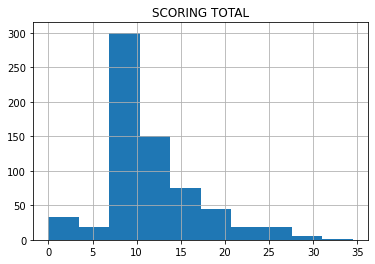

In [125]:
df_hist.hist()

<AxesSubplot:>

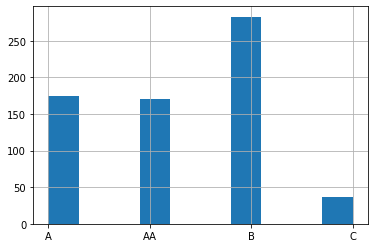

In [126]:
df_hist.CATEGORIA.hist()

In [127]:
df_hist.CATEGORIA.value_counts()

B     283
A     174
AA    171
C      37
Name: CATEGORIA, dtype: int64